In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.colors as mcolors
from scipy.interpolate import griddata


In [3]:
seed = 42

# Homework 4

## 1 The Bias Variance Trade-off

### 1.1 Theoretical Decomposition of the Mean Squared Error

done on paper

### 1.2 Practical Demonstration of the Bias-Variance Trade-Off

read and done

## 2 Polynomial Kernel SVM

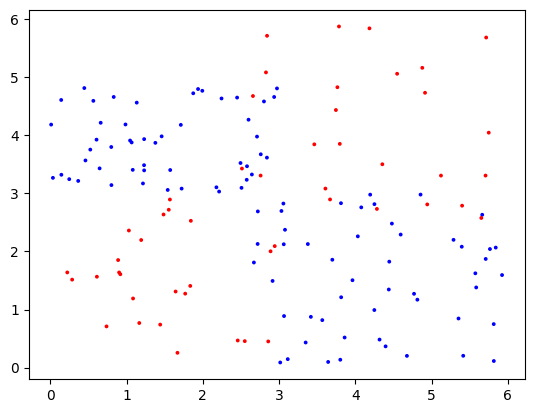

In [4]:
# 1. Load the data
datapoints = np.load('svm_data_3.npy')
X, Y, label = datapoints[:,0], datapoints[:,1], datapoints[:,2]

plt.scatter(X,Y,3, label, cmap='bwr')
plt.show()

In [5]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    datapoints[:,:2], 
    datapoints[:,2], 
    test_size=0.2, 
    random_state=seed,
    )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [6]:
# 2. Train the SVM
grid = {
    'C': [1, 1.5, 2, 2.5], 
    'gamma': [0.2, 0.1, 'scale'],
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5, 6],
    'coef0': [2, -1, 0, 1, 2, 3],
} 

clf = GridSearchCV(SVC(), grid, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.score(X_test, y_test))

{'C': 1, 'coef0': 2, 'degree': 5, 'gamma': 0.2, 'kernel': 'poly'}
0.9333333333333333


In [7]:
def plot_decision_boundary(clf, X_train, y_train, X_test, y_test, X, Y, title):
    dark_cmap = mcolors.ListedColormap(["#9E7702", "#980026"])
    light_cmap = mcolors.ListedColormap(["#FFC500", "#D46591"])

    w0_values = np.arange( X.min() - 0.1, X.max() + 0.1, 0.01)
    w1_values = np.arange( Y.min() - 0.1, Y.max() + 0.1, 0.01)
    W0, W1 = np.meshgrid(w0_values, w1_values)
    grid = np.c_[W0.ravel(), W1.ravel()]
    Z = clf.predict(grid).reshape(W0.shape)

    plt.contourf(W0, W1, Z, cmap=light_cmap, levels=[-1, 0, 1])
    plt.contour(W0, W1, Z, colors='black', linewidths=0.5)

    for target in range(2):
        plt.scatter(*X_train[y_train == target].T, color=dark_cmap(target), label=f"{target} (train)", edgecolors='black', zorder=2, marker='o')
        plt.scatter(*X_test[y_test == target].T, color=dark_cmap(target), label=f"{target} (test)", edgecolors='black', zorder=2, marker='s')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()


def plot_decision_boundary2(clf, X, Y, title):
    w0_values = np.arange( X[0].min() - 0.1, X[0].max() + 0.1, 0.01)
    w1_values = np.arange( X[1].min() - 0.1, X[1].max() + 0.1, 0.01)
    print(X.min(), X.max(), Y.min(), Y.max())
    W0, W1 = np.meshgrid(w0_values, w1_values)
    grid = np.c_[W0.ravel(), W1.ravel()]
    Z = clf.predict(grid).reshape(W0.shape)
    plt.contourf(W0, W1, Z, levels=60)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.tight_layout()
    plt.title(title)
    plt.show()

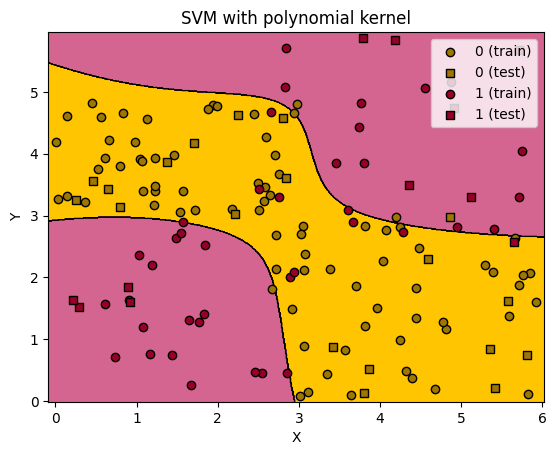

In [8]:
# plot the decision boundary
plot_decision_boundary(clf, X_train, y_train, X_test, y_test, X, Y, 'SVM with polynomial kernel')

In [9]:
# 2. Train the SVM
grid = {
    'C': [1, 1.5, 2, 2.5], 
    'gamma': [0.2, 0.1, 'scale'],
    'kernel': ['rbf'],
    'coef0': [2, -1, 0, 1, 2, 3],
} 

clf = GridSearchCV(SVC(), grid, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.score(X_test, y_test))

{'C': 2.5, 'coef0': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.9333333333333333


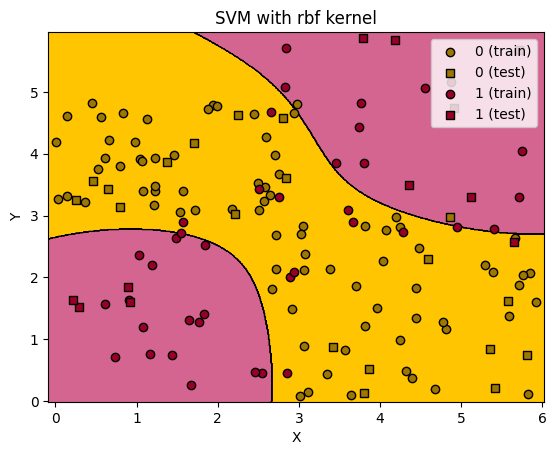

In [10]:
plot_decision_boundary(clf, X_train, y_train, X_test, y_test, X, Y, 'SVM with rbf kernel')

### Model Selection for Polynomial Regression

(1000, 3)
(1000,) (1000,) (1000,)
-4.982792812775512 4.996871614111484 -2.99583955294654 6.976358733655834


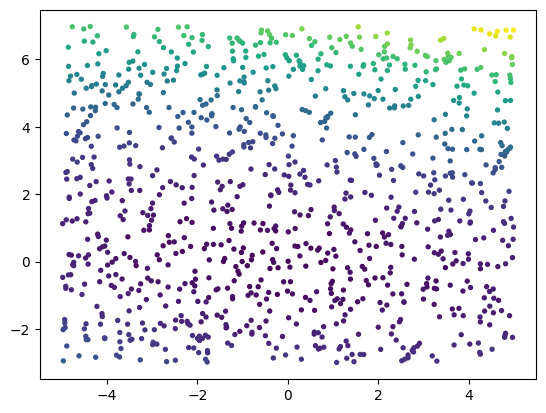

In [11]:
datapoints = np.load('poly_dataset.npy')
X, Y, label = datapoints[:,0], datapoints[:,1], datapoints[:,2]
print(datapoints.shape)
print(X.shape, Y.shape, label.shape)
print(X.min(), X.max(), Y.min(), Y.max())
plt.scatter(X,Y,8, label)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    datapoints[:,:2],
    datapoints[:,2], 
    test_size=0.2, 
    random_state=seed
    )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 2) (200, 2) (800,) (200,)


In [13]:
def fit_polynomial(x, y, degree, ridge):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree)),
        ('ridge', Ridge(alpha=ridge, fit_intercept=False)),
    ])

    model.fit(x, y)
    return model

def fit_polynomial2(x, y, degree, ridge):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree)),
        ('lasso', Lasso(alpha=ridge, fit_intercept=False)),
    ])

    model.fit(x, y)
    return model

score: 0.9979
mse: 1.0541
-4.938260886899731 6.903757707985131 -1.5356946134663254 90.07653437710304


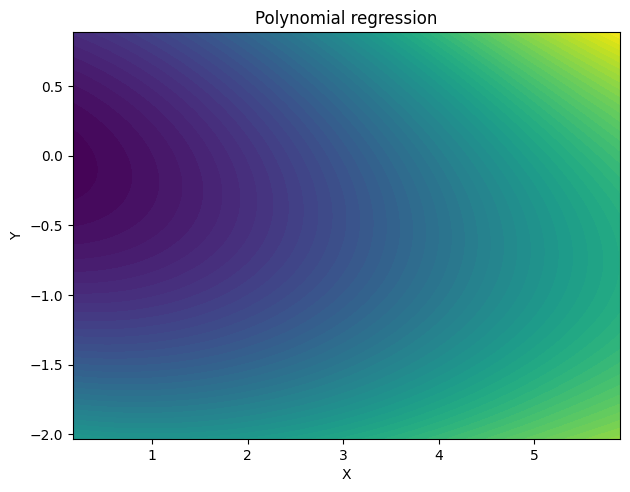

In [14]:
grid = {
    'degree': [1,2,3,4,5,6],
    'alpha': [0.0, 0.001, 0.01, 0.1, 1.0],
}
def get_best_params(grid, X_train, y_train):
    params = it.product(grid['degree'], grid['alpha'])
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    score = []
    for param in params:
        mse = []
        for train_index, test_index in kfold.split(X_train):
            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
            model = fit_polynomial(X_train_fold, y_train_fold, param[0], param[1])
            y_pred = model.predict(X_test_fold)
            mse.append(mean_squared_error(y_test_fold, y_pred))
        score.append((param, np.mean(mse)))

    return min(score, key=lambda x: x[1])[0]




best_param = get_best_params(grid, X_train, y_train)

model = fit_polynomial(X_train, y_train, best_param[0], best_param[1])
y_pred = model.predict(X_test)
print(f"score: {model.score(X_test, y_test):.4f}")
print(f"mse: {mean_squared_error(y_test, y_pred):.4f}")


plot_decision_boundary2(model, X_test, y_test, 'Polynomial regression')

#### 5 answering some questions:

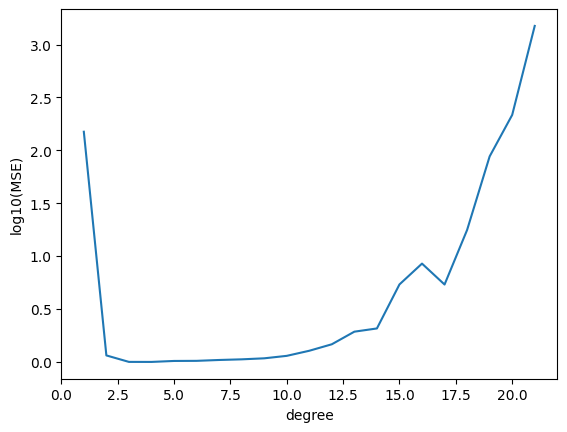

In [15]:
#ploting performance over the degree of the polynomial

import warnings
warnings.filterwarnings('ignore')

grid = {
    'degree': list(range(1, 22)),
    'alpha': [0.0],
}
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

params = it.product(grid['degree'], grid['alpha'])
score = []
for param in params:
    mse = []
    for train_index, test_index in kfold.split(X_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        model = fit_polynomial(X_train_fold, y_train_fold, param[0], param[1])
        y_pred = model.predict(X_test_fold)
        mse.append(mean_squared_error(y_test_fold, y_pred))
    score.append((param, np.log10(np.mean(mse))))

plt.plot([x[0][0] for x in score], [x[1] for x in score])
plt.xlabel('degree')
plt.ylabel('log10(MSE)')
plt.show()

Standardizaition ensures that all features contribute equally ig, so some features coefficient might conribute more if large.

And numerical stability is also nice!

StandardScaler should def be put before polynomialfeatures as this gives accuracy of 99 while the other way gives 11 >.>

when using a higher alpha, the mse with expolentially increase, ig it overfits in some way

In [16]:
import warnings
warnings.filterwarnings('ignore')

grid = {
    'degree': list(range(1, 22,2)),
    'alpha': [0.001, 0.01, 0.1, 0.3, 0.6, 1.0],
}
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

params = list(it.product(grid['degree'], grid['alpha']))
score = []
score2 = []

for param in params:
    mse = []
    for train_index, test_index in kfold.split(X_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        model = fit_polynomial(X_train_fold, y_train_fold, param[0], param[1])
        y_pred = model.predict(X_test_fold)
        mse.append(mean_squared_error(y_test_fold, y_pred))
    score.append((param, np.log10(np.mean(mse))))

print(min(score, key=lambda x: x[1]))
for param in params:
    mse = []
    for train_index, test_index in kfold.split(X_train):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        model = fit_polynomial2(X_train_fold, y_train_fold, param[0], param[1])
        y_pred = model.predict(X_test_fold)
        mse.append(mean_squared_error(y_test_fold, y_pred))
    score2.append((param, np.log10(np.mean(mse))))

print(min(score2, key=lambda x: x[1]))

((3, 0.001), -0.001192177563689288)
((3, 0.001), -0.0012511550572792726)


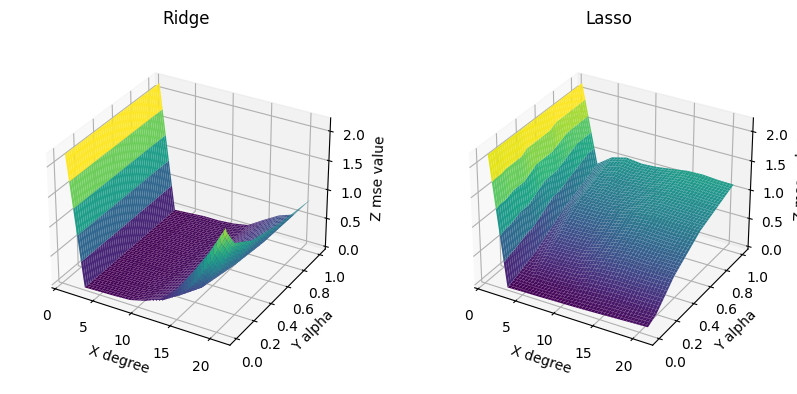

In [17]:
degrees = np.array([x[0][0] for x in score])
alphas = np.array([x[0][1] for x in score])
log_mse = np.array([x[1] for x in score])

log_mse2 = np.array([x[1] for x in score2])

degrees_fine = np.linspace(degrees.min(), degrees.max(), 200)
alphas_fine = np.linspace(alphas.min(), alphas.max(), 200)
X, Y = np.meshgrid(degrees_fine, alphas_fine)

Z = griddata((degrees, alphas), log_mse , (X, Y), method='linear')
Z2 = griddata((degrees, alphas), log_mse2, (X, Y), method='linear')

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('X degree')
ax1.set_ylabel('Y alpha')
ax1.set_zlabel('Z mse value')
ax1.set_box_aspect(None, zoom=0.90) # the stupid z label got cropped for some reason
ax1.set_title('Ridge')

ax2.plot_surface(X, Y, Z2, cmap='viridis')
ax2.set_xlabel('X degree')
ax2.set_ylabel('Y alpha')
ax2.set_zlabel('Z mse value')
ax2.set_box_aspect(None, zoom=0.90) # the stupid z label got cropped for some reason
ax2.set_title('Lasso')

plt.show()
# aslo dont mind how many times i ran this cell, 
# either it got cropped on the right or the whitespace on the left got too big
# true debugging rabbithole >:(
# matplotlib is a pain
# and stupid.
# but plot turned out cool enough